In [3]:
library(ggplot2)
library(dplyr)
library(readr)
library(geomtextpath)
library(showtext)
library(ggrepel)
library(paletteer)

## Top Artists Bump Chart

Rows: 60 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): artist_name, label
dbl (3): year, total_seconds_listened_to, rank
lgl (1): is_latest

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Removed 26 rows containing missing values or values outside the scale range
(`geom_label_repel()`).”


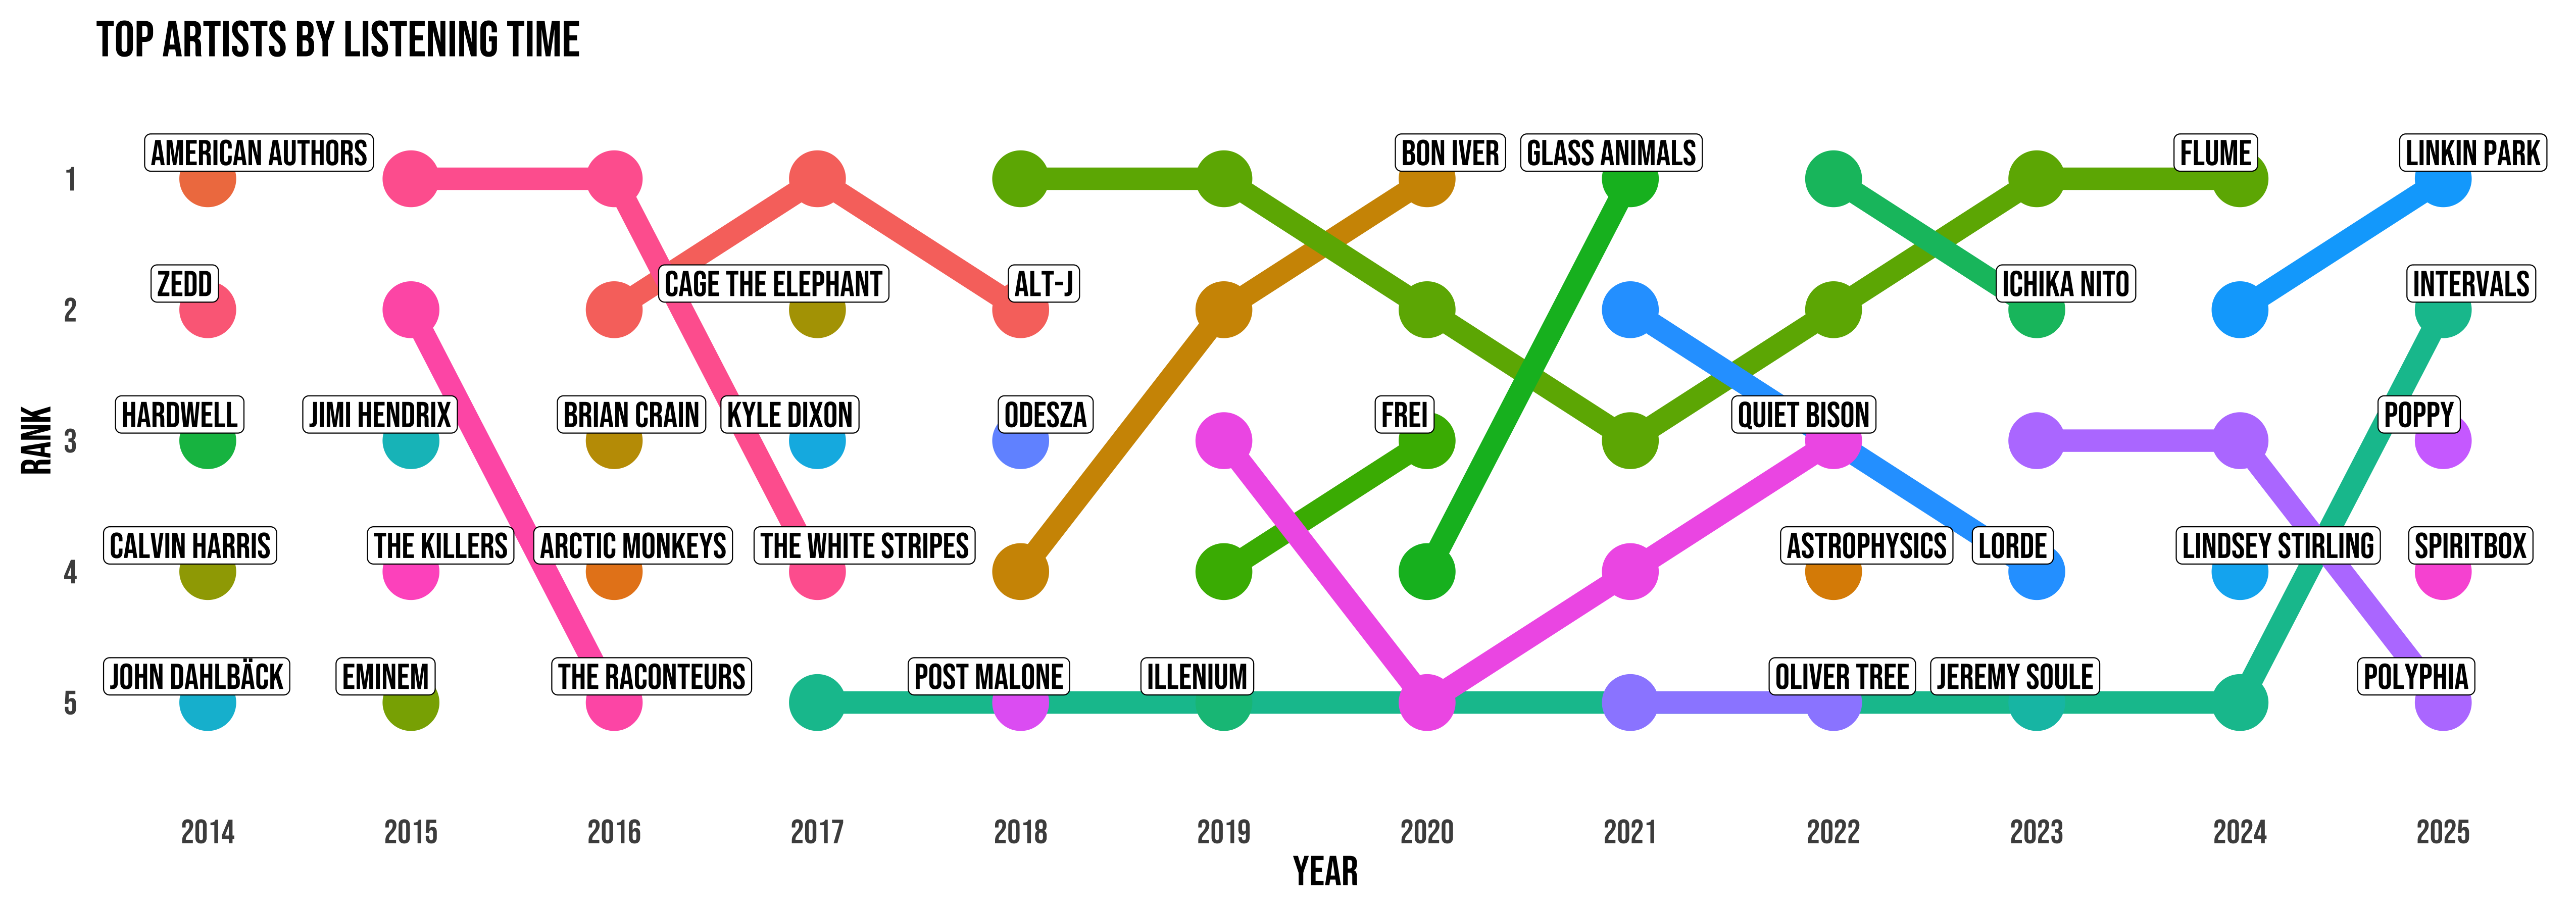

In [ ]:
top_artists_per_year <- read_csv("/Users/christiantapp/code/spotify/data/processed/top_artists_per_year.csv")

top_artists_per_year <- top_artists_per_year %>%
  mutate(
    label = ifelse(artist_name == "Kyle Dixon & Michael Stein", "Kyle Dixon", label)
  )

global_font = 'Bebas Neue'

font_add_google(name = global_font)
showtext_auto()

fig <- ggplot(top_artists_per_year,
       aes(x = year, y = rank, color = artist_name)) +
  geom_line(linewidth = 5) +
  geom_point(size = 12) +
  geom_label_repel(
    aes(label = label), 
    color = "black", 
    size = 6, 
    family = global_font,
    label.padding = unit(0.2, "lines"),
    label.r = unit(0.2, "lines"),
    force_pull = 0,
    force = 0.005,
    direction = "x",
    nudge_y = 0.2,
    min.segment.length = unit(10, "lines")

  ) +
  scale_y_reverse(limits = c(5.5, 0.5)) +
  scale_x_continuous(breaks = sort(unique(top_artists_per_year$year))) +
  #scale_color_paletteer_d("palettesForR::Plasma") +
  labs(
    title = "Top Artists by Listening Time",
    x = "Year",
    y = "Rank"
  ) +
  theme_minimal(base_size = 20, base_family = global_font) +
  theme(
    legend.position = "none",
    panel.grid = element_blank()

  )



options(repr.plot.width = 17, repr.plot.height = 6, repr.plot.res = 300)  
fig
# ggsave(filename = '/Users/christiantapp/code/spotify/plots/top_artists_bump.png',
# plot = fig,
# width = 17/3,
# height = 6/3,
# units = 'in',
# dpi = 300,
# scale = 1,
# bg = 'white',
# limitsize = FALSE)